In [206]:
import random
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
class Player:
    def __init__(self, name, max_risk=None):
        self.name = name
        self.score = 0
        self.turn_score = 0
        #max risk per turn
        self.max_risk = 0
        self.die = 0

    def turn(self):
        self.die = random.choice([1, 2, 3, 4, 5, 6])
        d = self.die
        self.game_score()

    def game_score(self):
        if self.die == 1:
            self.turn_score = 0
            return
        else:
            self.turn_score += self.die
            self.roll_again()

    def roll_again(self):
        if self.turn_score >= self.max_risk:
            self.score += self.turn_score
            self.turn_score = 0
            return
        else:
            self.turn_score = 0
            self.turn()


In [234]:
class Game:
    def __init__(self, player1, player2):
        self.round = 0

    def start_game(self):
        while self.round <= 6:
            self.round +=1
            player1.turn()
            player2.turn()

    def end_game(self):
        return

####Basic Player will play all games risking only one roll (never risking or getting more than a six).
####Strategy Player will always risk another roll while score is between 10 - 49 points and will increase the risk by one point every 100 games.

In [235]:
p1_risk = 6
p2_risk = 10
p1_ave = []
p2_ave = []
p1_risk_list = []
p2_risk_list = []
for _ in range(40):
    count = 0
    # List of scores to be averaged later
    p1 = []
    p2 = []
    while count <= 99:
        count += 1
        #always rolls once only per turn
        player1 = Player(name='Basic Player')
        #increasing max_risk every 100 plays
        player2 = Player(name='Strategy Player', max_risk=p2_risk)
        #increasing max_risk every 100 plays
        game = Game(player1, player2)
        game.start_game()
        p1.append(player1.score)
        p2.append(player2.score)
    p1_ave.append(statistics.mean(p1))
    p2_ave.append(statistics.mean(p2))
    p1_risk_list.append(p1_risk)
    p2_risk_list.append(p2_risk)
    p2_risk += 1

#####At first glance, it appears below that the player who only rolls once per turn (never able to achieve more than 6 on a turn), averages scores in a similar range to the average scores of the player who's risk tolerance stopped between 10 - 49 points on a roll.

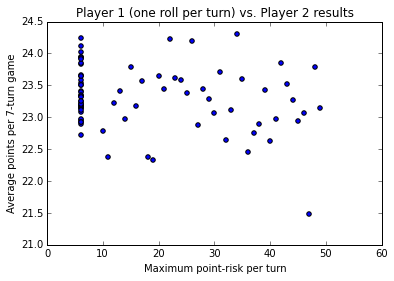

In [236]:
x1 = p1_risk_list, p2_risk_list 
y1 = p1_ave, p2_ave
plt.scatter(x1, y1)
plt.title("Player 1 (one roll per turn) vs. Player 2 results")
plt.ylabel("Average points per 7-turn game")
plt.xlabel("Maximum point-risk per turn")

###### Below: When playing 100 games of Pig per level of risk (taking no more rolls after reaching the defined level of risk or higher on a final roll) the best average scores fall consistently around the 26-27 points max risk
#####However, suprisingly, 26, 35, 40-42 and up until around 47-48 points max risk often show a similarly good average score.
##### There is still a lot of variation in the results between batches of 100 games run, but the same peaks do seem to fall in the same areas over time.
###27 is my pick for best strategy from these tests

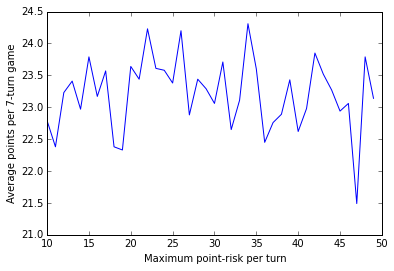

In [237]:
x1 = p2_risk_list 
y1 = p2_ave
plt.plot(x1, y1)
plt.ylabel("Average points per 7-turn game")
plt.xlabel("Maximum point-risk per turn")